In [2]:
import pymc3 as pm 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import arviz as az 

In [3]:
print(f'Running on PyMC3 v{pm.__version__}')

Running on PyMC3 v3.11.2


In [4]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [5]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

#y = a + b*x
true_regression_line = true_intercept + true_slope*x

#add noise
y = true_regression_line + np.random.normal(scale = 0.5, size = size)

data = dict(x = x, y = y)

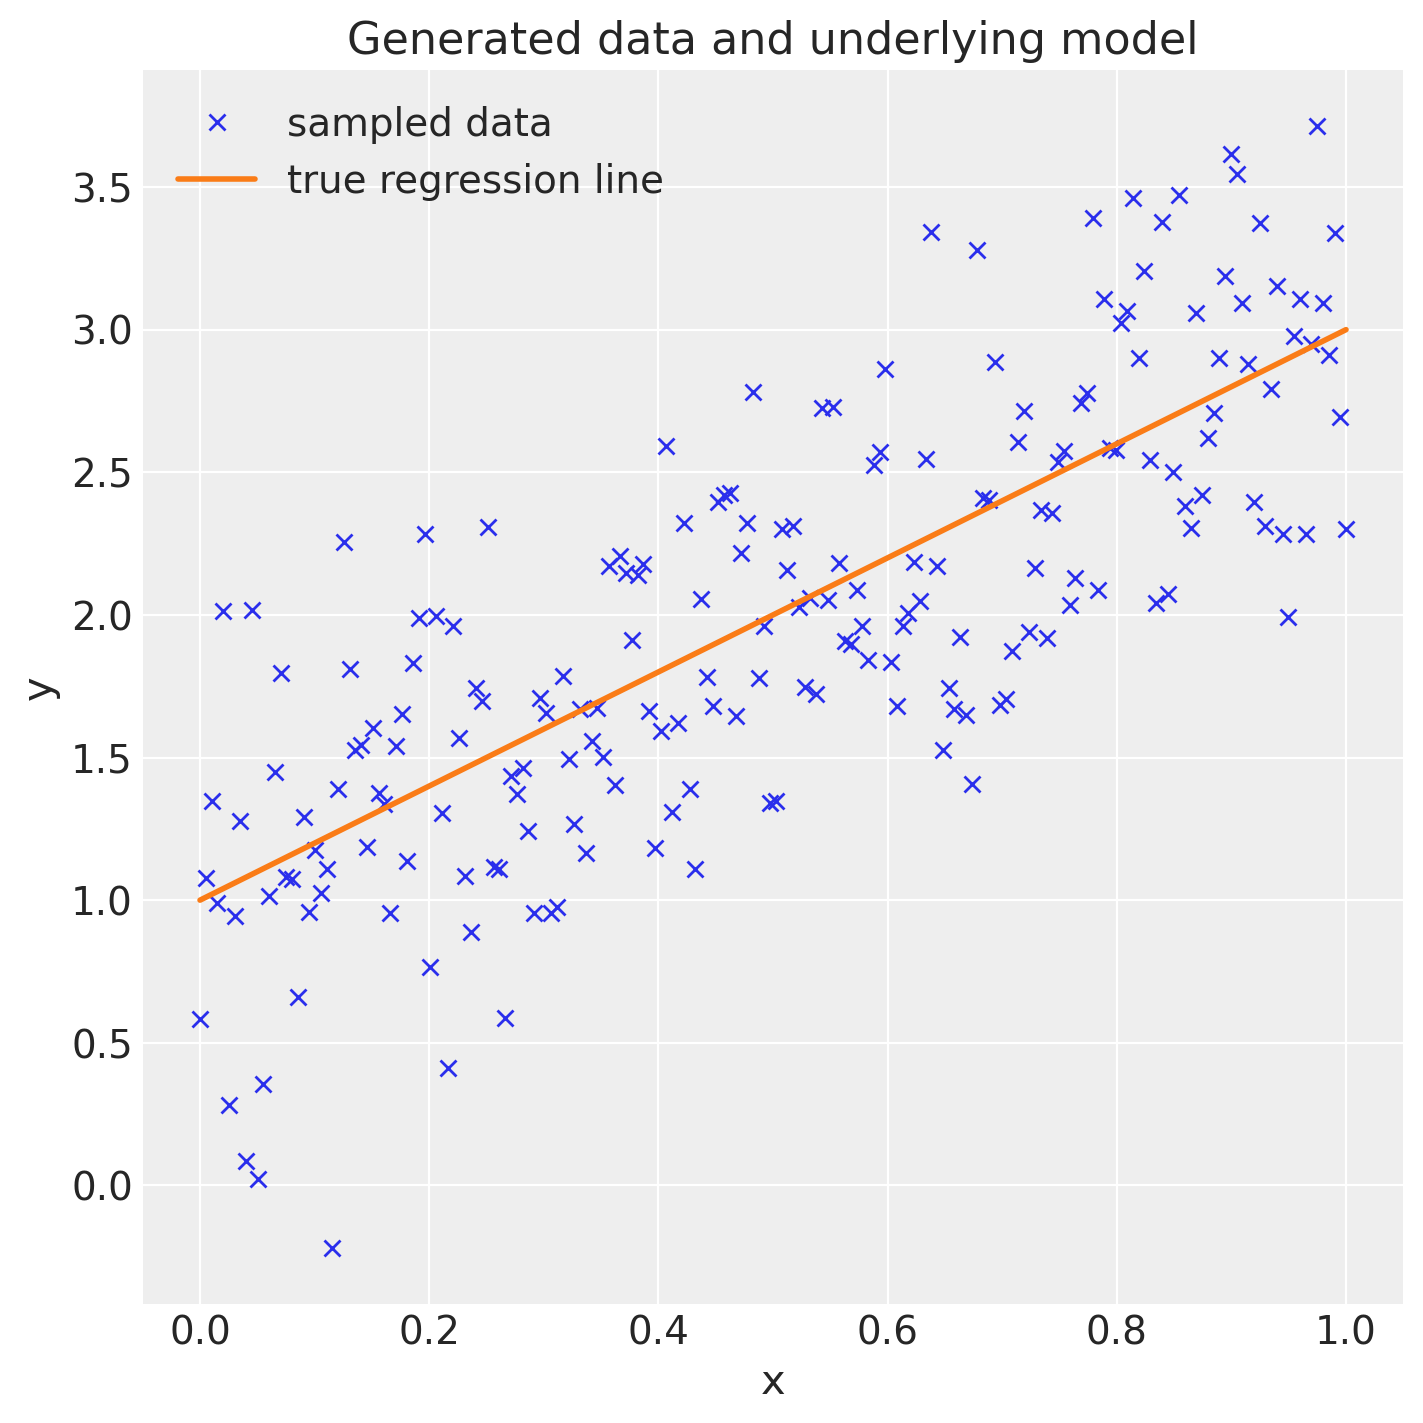

In [6]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, xlabel = 'x', ylabel = 'y', title = 'Generated data and underlying model')
ax.plot(x,y, 'x', label = 'sampled data')
ax.plot(x, true_regression_line, label = 'true regression line', lw = 2.0)
plt.legend(loc = 0);

In [7]:
with pm.Model() as model:
    #Define priors
    sigma = pm.HalfCauchy('sigma', beta = 10, testval = 1.0)
    intercept = pm.Normal('intercept', 0, sigma = 20)
    x_coeff = pm.Normal('x', 0, sigma = 20)

    #Define likelihood
    likelihood = pm.Normal('y', mu = intercept + x_coeff*x, sigma = sigma, observed = y)

    #Inference
    trace = pm.sample(3000, cores = 2)

/home/ishikawa/anaconda3/envs/pymc/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # This is added back by InteractiveShellApp.init_path()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, intercept, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 3 seconds.


/home/ishikawa/anaconda3/envs/pymc/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
/home/ishikawa/anaconda3/envs/pymc/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/home/ishikawa/anaconda3/envs/pymc/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 700x700 with 0 Axes>

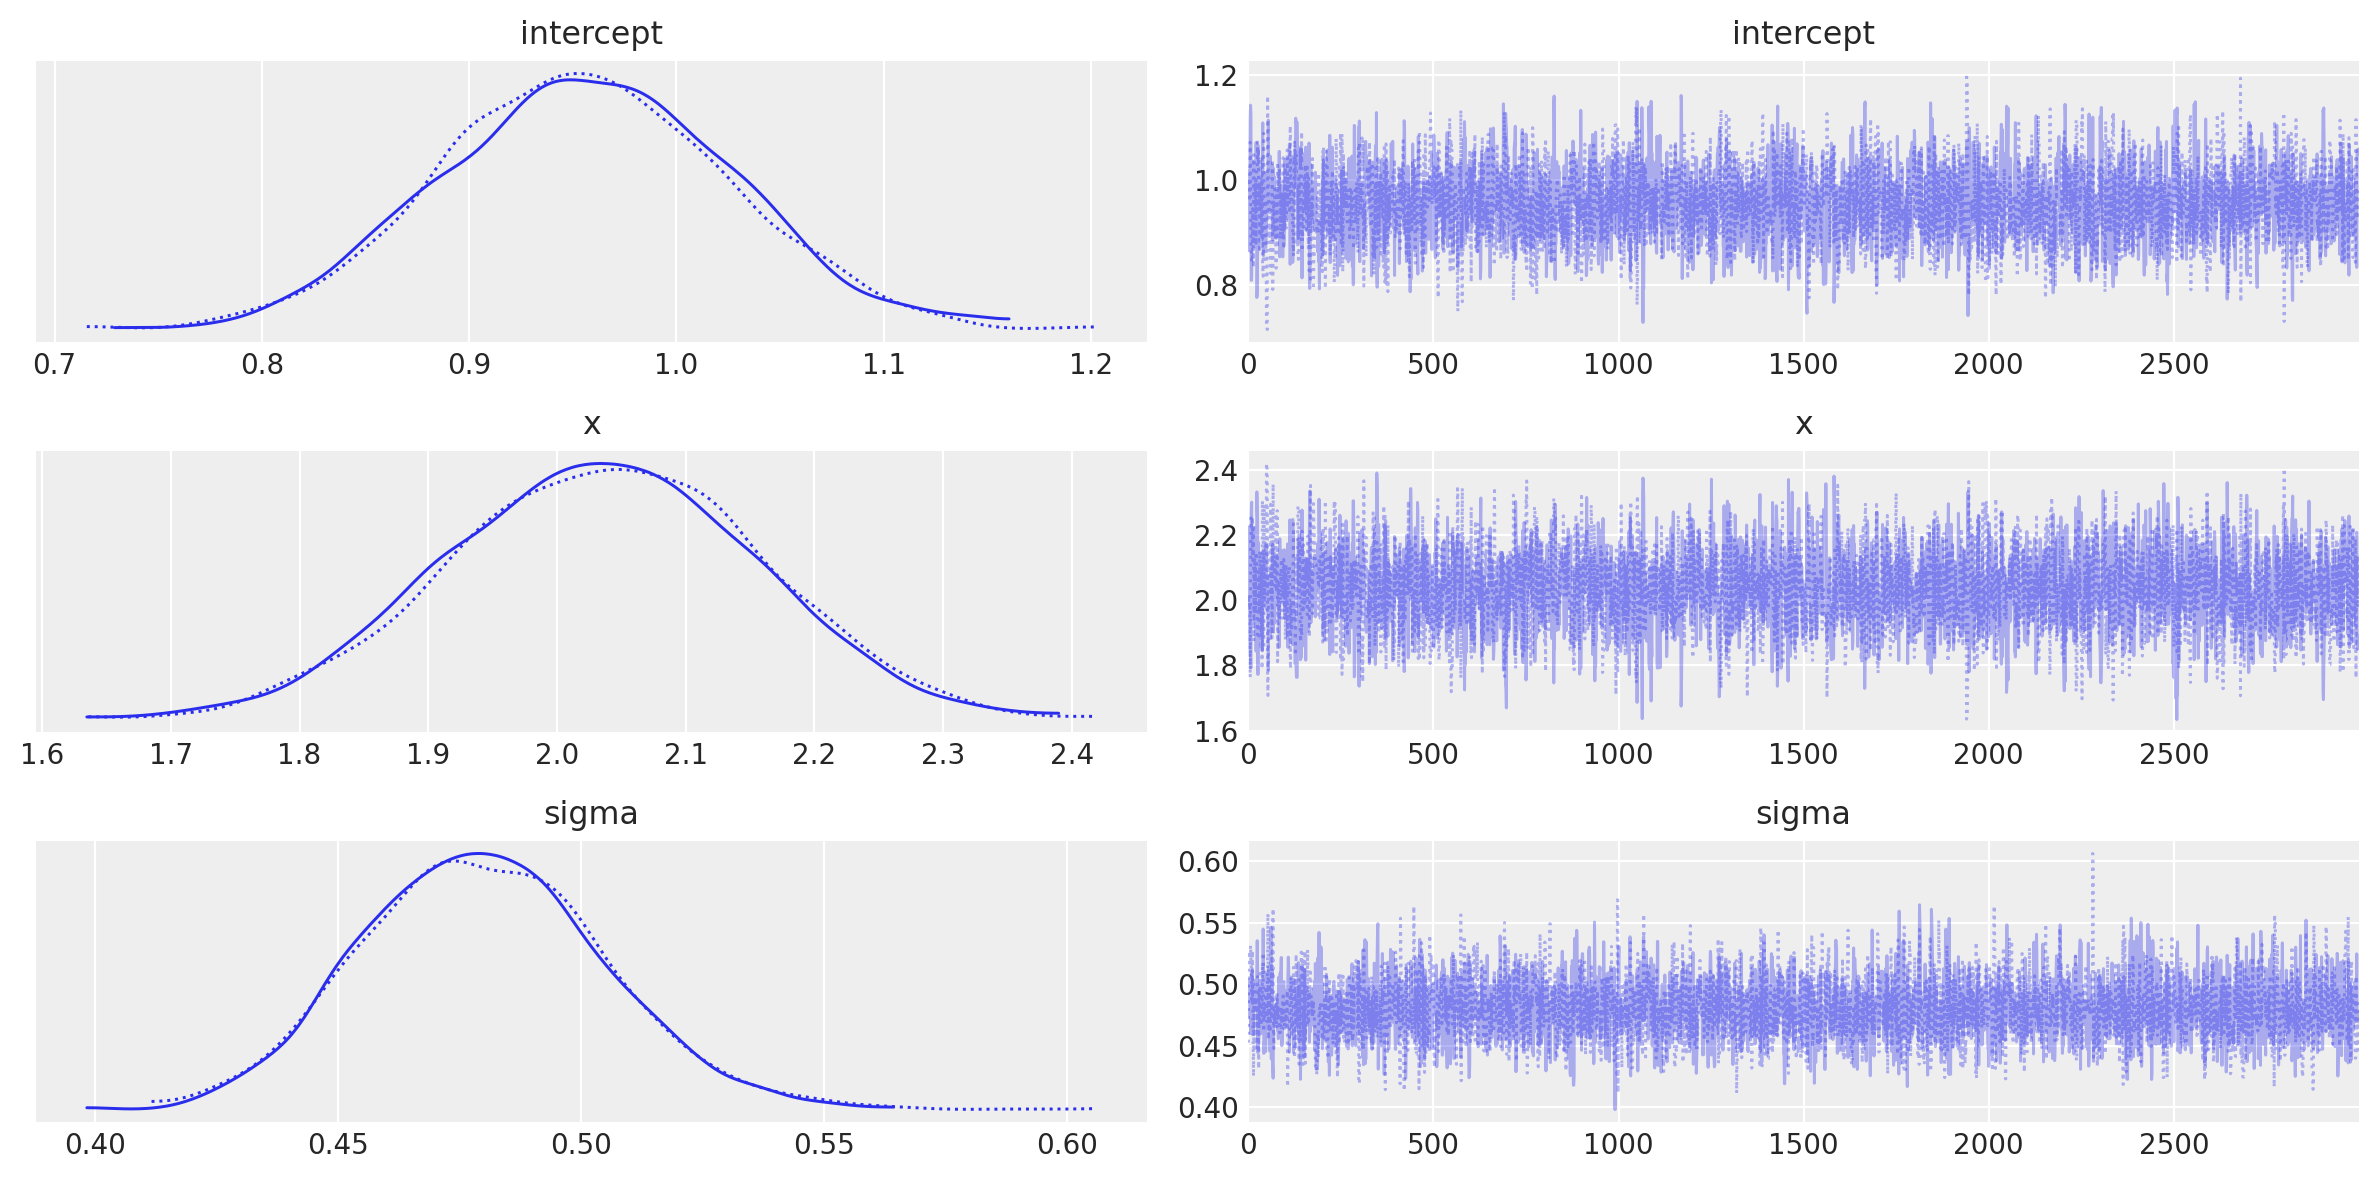

In [8]:
plt.figure(figsize = (7,7))
pm.traceplot(trace)
plt.tight_layout()

/home/ishikawa/anaconda3/envs/pymc/lib/python3.7/site-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


Text(0, 0.5, 'y')

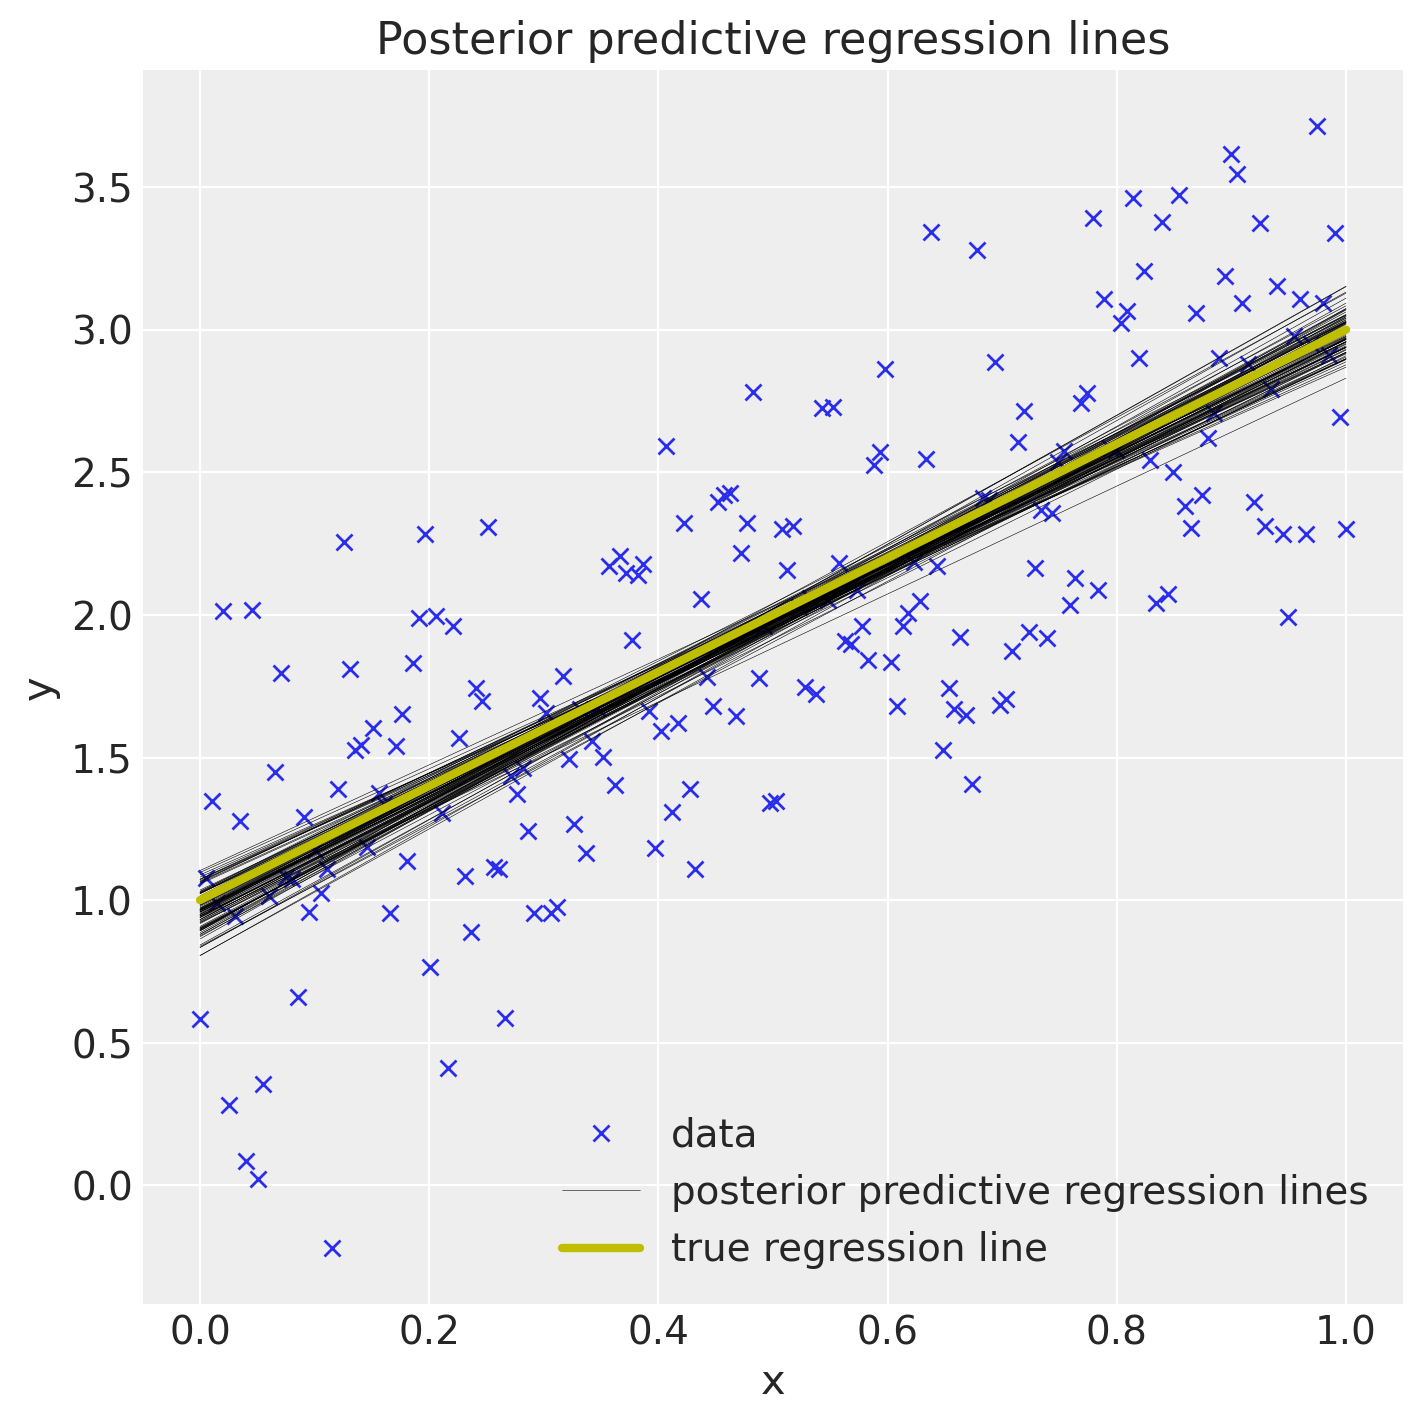

In [9]:
plt.figure(figsize = (7,7))
plt.plot(x, y, 'x', label = 'data')
#Not Using GLM Function
pm.plot_posterior_predictive_glm(trace, samples = 100, 
                                eval = x,
                                lm = lambda x, sample: sample['intercept'] + sample['x']*x,
                                label = 'posterior predictive regression lines')
plt.plot(x, true_regression_line, label = 'true regression line', lw= 3.0, c ="y")


plt.title('Posterior predictive regression lines')
plt.legend(loc = 0)
plt.xlabel('x')
plt.ylabel('y')